In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
print("Import Successful")

Import Successful


In [3]:
# Loading the dataset
data = pd.read_excel(r"C:\Users\Olym\Downloads\Data_Analysis_Self_Projects\Netflix_Project\Netflix_Dataset.csv.xlsx")
data.head()

,show_id,type,title,country,date_added,release_year,listed_in,director,movie_duration_min,season_duration,rating
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,Documentaries,Kirsten Johnson,90,0,Parental Guidance (13+)
1,s3,TV Show,Ganglands,France,2021-09-24,2021,Crime TV Shows,Julien Leclercq,0,1,Mature Audience
2,s3,TV Show,Ganglands,France,2021-09-24,2021,International TV Shows,Julien Leclercq,0,1,Mature Audience
3,s3,TV Show,Ganglands,France,2021-09-24,2021,TV Action & Adventure,Julien Leclercq,0,1,Mature Audience
4,s6,TV Show,Midnight Mass,United States,2021-09-24,2021,TV Dramas,Mike Flanagan,0,1,Mature Audience


In [4]:
data.dtypes

show_id                       object
type                          object
title                         object
country                       object
date_added            datetime64[ns]
release_year                   int64
listed_in                     object
director                      object
movie_duration_min             int64
season_duration                int64
rating                        object
dtype: object

## Exploratory Data Analysis

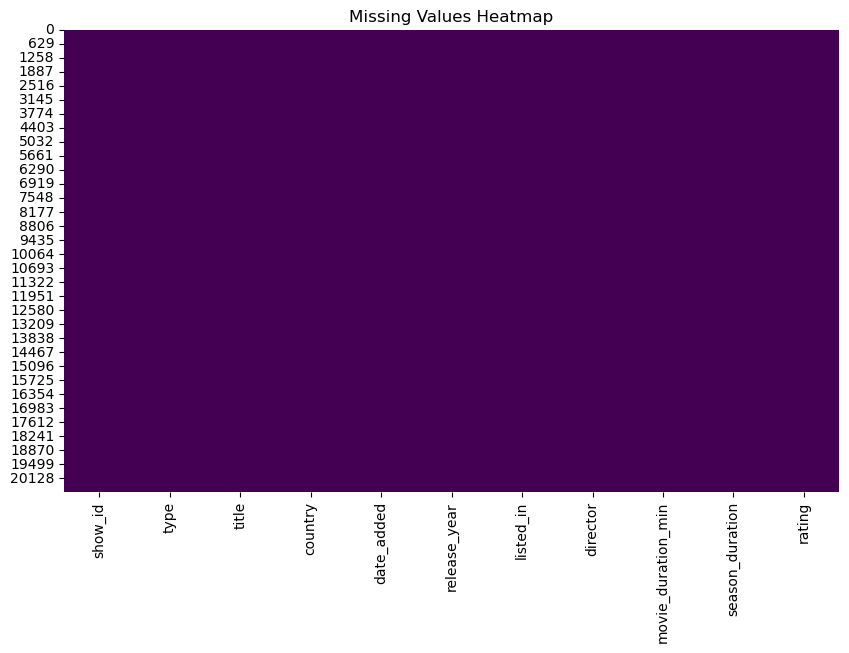

✅ No missing values in the dataset


In [5]:
#Finding out missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()
if data.isnull().sum().sum() == 0:
    print("✅ No missing values in the dataset")
else:
    print("⚠️ Missing values present")

#### 1. Distribution of Content Type

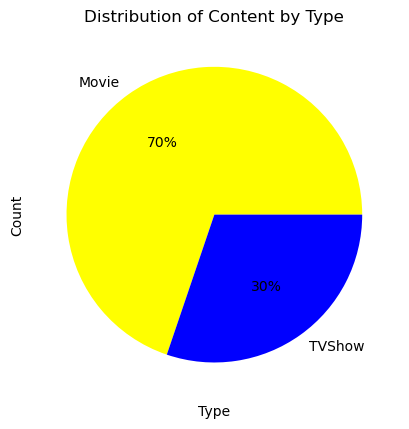

In [6]:
#sns.countplot(data=data, x="type")

freq=data['type'].value_counts()
#fig,axes=plt.subplots(1,2,figsize=(8,4))
colours = ["Yellow", "Blue"]
plt.pie(freq,labels=['Movie','TVShow'],colors = colours, autopct='%.0f%%')
#sns.countplot(data=data, x="type", hue="type", palette="Set2", legend=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


#### 2. Distribution of Genres By Type

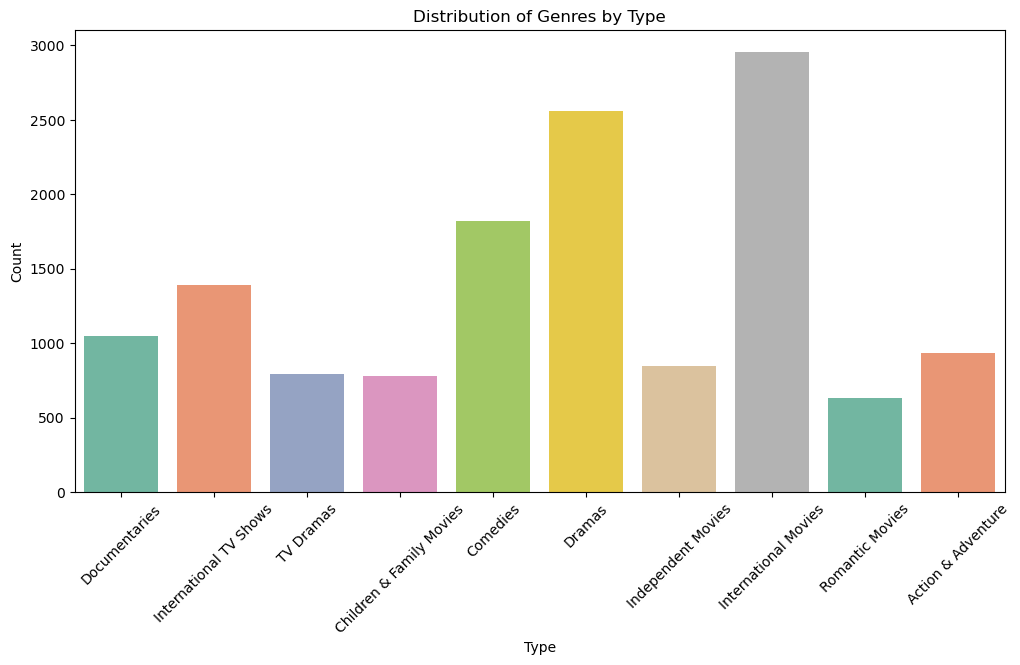

In [7]:
type_counts = data['listed_in'].value_counts().nlargest(10).index
filtered_data = data[data['listed_in'].isin(type_counts)]

# Plotting the most common genres
plt.figure(figsize=(12,6))   # width=12 inches, height=6 inches
sns.countplot(data=filtered_data, x="listed_in", hue="listed_in", palette="Set2", legend=False)
plt.xticks(rotation=45)   # rotate 45 degrees
plt.title('Distribution of Genres by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### 3. Top 10 Popular Genres for Movies on Netflix

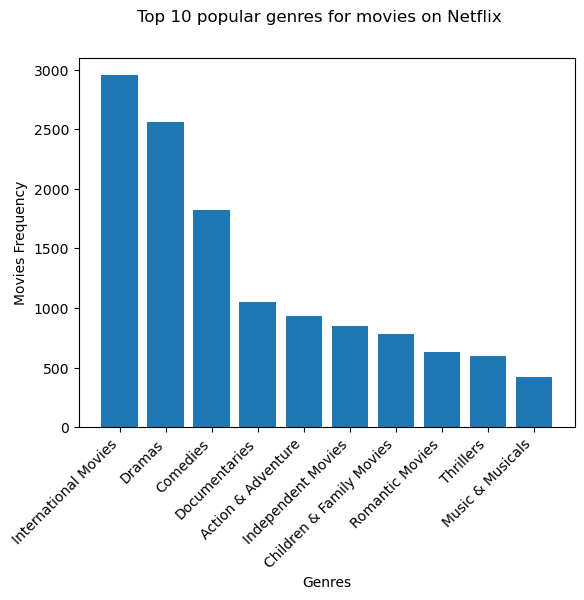

In [8]:
 popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
 #popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False) [:10]
 plt.bar(popular_movie_genre.index, popular_movie_genre.values)
 plt.xticks(rotation=45, ha='right')
 plt.xlabel("Genres")
 plt.ylabel("Movies Frequency")
 plt.suptitle("Top 10 popular genres for movies on Netflix")
 plt.show()

#### 3. Top 10 Popular Genres for TV Shows on Netflix

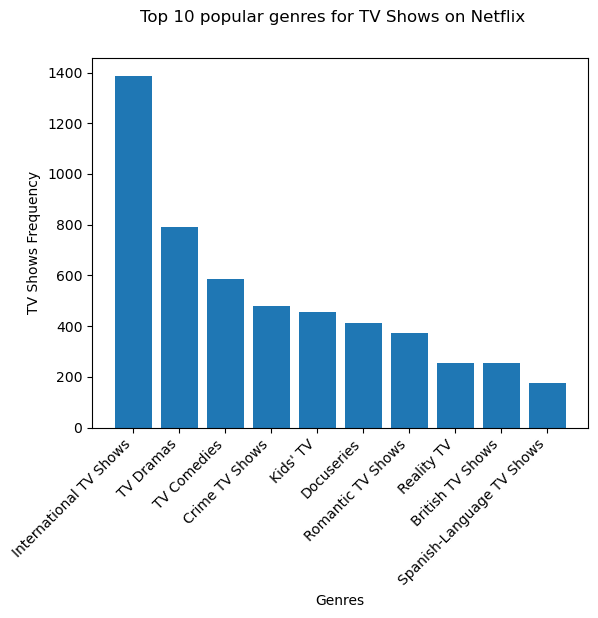

In [9]:
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False) [:10]
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

#### 4. Top 10 Directors With The Most Titles

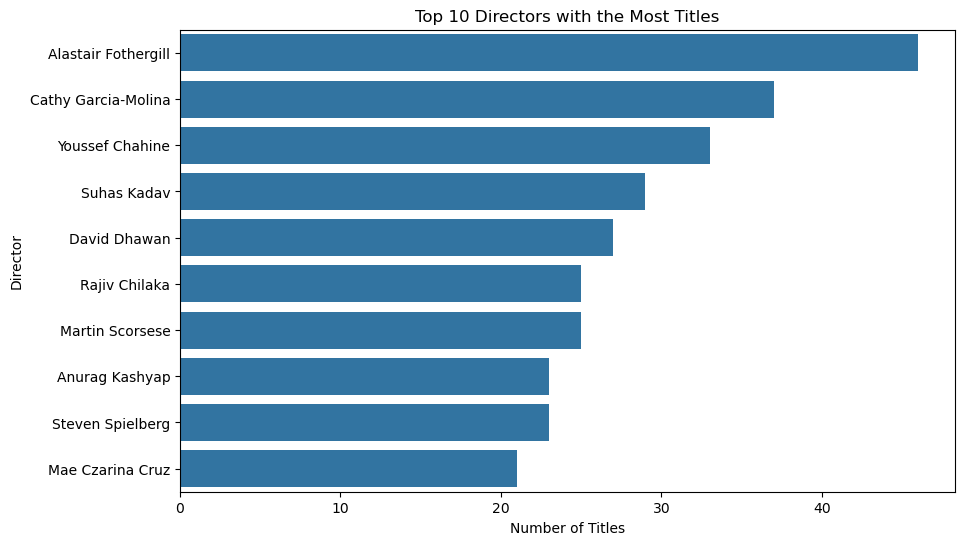

In [10]:
# Count titles by director

# Step 1 removing the data with the names of directors as "Not Given"
top_directors = (                                 
    data['director']
    .dropna()                                     # remove NaN
    .loc[lambda x: x != "Not Given"]              # exclude only from counting
    .str.split(',').explode().str.strip()         # handle multiple directors
    .value_counts()
    .head(10)
)
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

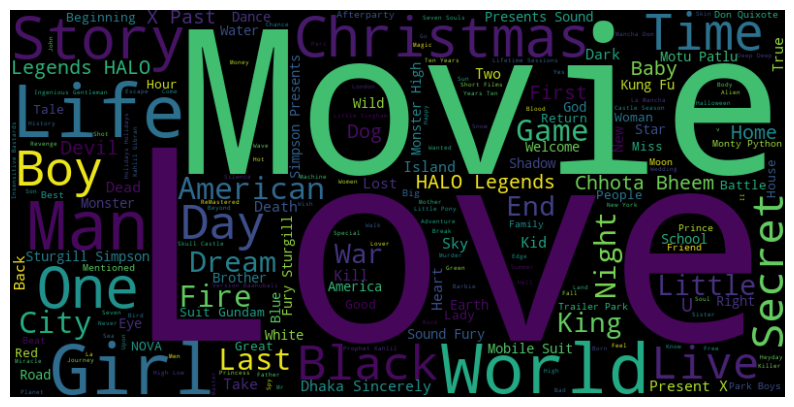

In [11]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

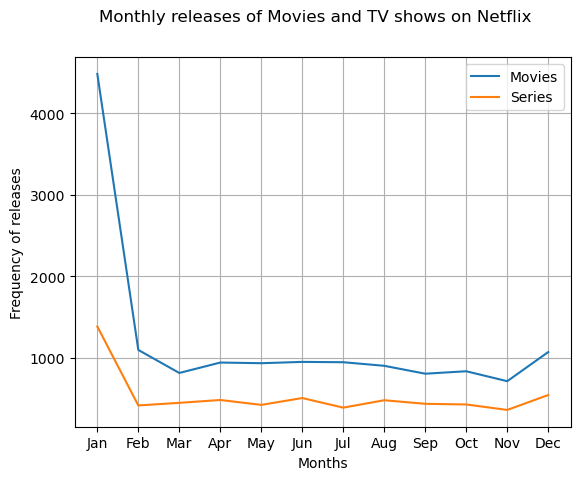

In [12]:
# Extract month
data['month'] = data['date_added'].dt.month
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

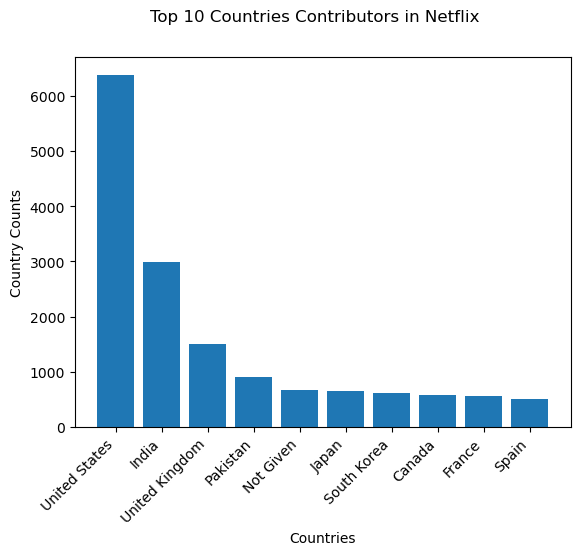

In [16]:
top_10_countries = data['country'].value_counts().nlargest(10)
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Countries")
plt.ylabel("Country Counts")
plt.suptitle("Top 10 Countries Contributors in Netflix")
plt.show()